<a href="https://colab.research.google.com/github/ZohanaZuthi/Machine_Learning_Algorithm_Udemy/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is LDA?
Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used to classify data by finding a linear combination of features that best separates two or more classes. Unlike PCA, which is unsupervised and maximizes variance, LDA maximizes the separation between classes.

How Does LDA Work?
LDA seeks to project the data onto a lower-dimensional space while maximizing the separation between the classes. It does so by minimizing within-class variance and maximizing between-class variance.

Steps Involved in LDA:
Compute the Mean Vectors

For each class, calculate the mean vector of the features.
Compute the Scatter Matrices

Within-class scatter matrix (Sw): Measures how much data points in the same class scatter from their class mean.
Between-class scatter matrix (Sb): Measures how far the class means are from the overall mean.
Compute Eigenvectors and Eigenvalues

LDA solves the eigenvalue problem for
𝑆
𝑏
−
1
𝑆
𝑤
Sb
−1
 Sw to find the directions (eigenvectors) that maximize the separation between classes.
Select the Linear Discriminants

Choose the top k eigenvectors with the highest eigenvalues, which represent the best directions for separating classes.
Project Data onto the Linear Discriminants

The data is transformed into this new space, and classification can be performed on this lower-dimensional space.
Difference Between PCA and LDA:
PCA: Unsupervised, maximizes variance, doesn’t use class labels, and works for reducing the dimensionality in general.
LDA: Supervised, maximizes class separation, uses class labels, and is specifically used for classification tasks.

## Importing the Features

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Importing Dataset**

In [32]:
dataset=pd.read_csv('Wine.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## **Splitting Dataset**

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## **Feature Scaling**

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## **Applying LDA**

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
# generally it is 2

X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)

## **Training with logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)


LogisticRegression(random_state=0)

## **Making the confusion Matrix**

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

## **Visualising the Training Set**

<ipython-input-38-dcbaaf9cb35d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


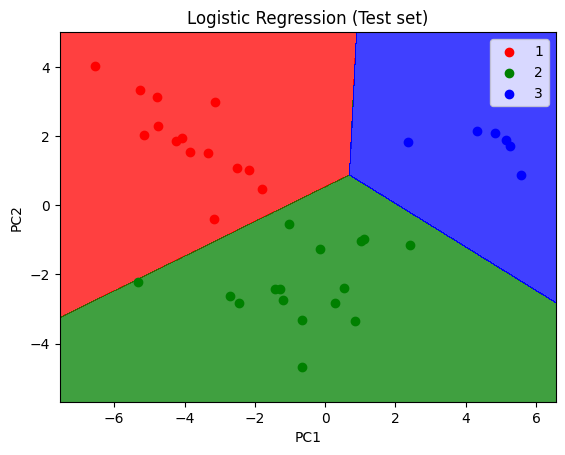

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()